Import statements

In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import heatmap
from mlxtend.plotting import scatterplotmatrix
import matplotlib.pyplot as plt

In [3]:
header_list = ['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]','NssssC', 'nCb-', 'C%', 'nCp', 'nO', 'F03[C-N]',
               'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L', 'F03[C-O]', 'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)', 
              'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'SpMax_A', 'Psi_i_1d', 'B04[C-Br]', 'SdO' , 'TI2_L', 'nCrt',
               'C-026', 'F02[C-N]', 'nHDon', 'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)', 'nArCOOR', 'nX', 'TARGET']
df = pd.read_csv("NewBioDeg.csv", names = header_list)
columns = df.columns
df.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,TARGET
0,3.919,2.6909,0.0,0.0,0.0,0.0,0.0,31.4,2.0,0.0,...,0.0,0.0,0.0,2.949,1.591,0.0,7.253,0.0,0.0,RB
1,4.170,2.1144,0.0,0.0,0.0,0.0,0.0,30.8,1.0,1.0,...,0.0,0.0,0.0,3.315,1.967,0.0,7.257,0.0,0.0,RB
2,3.932,3.2512,0.0,0.0,0.0,0.0,0.0,26.7,2.0,4.0,...,0.0,0.0,1.0,3.076,2.417,0.0,7.601,0.0,0.0,RB
3,3.000,2.7098,0.0,0.0,0.0,0.0,0.0,20.0,0.0,2.0,...,0.0,0.0,NaN,3.046,5.000,0.0,6.690,0.0,0.0,RB
4,4.236,NaN,0.0,0.0,0.0,0.0,0.0,29.4,2.0,4.0,...,0.0,0.0,0.0,3.351,2.405,0.0,8.003,0.0,0.0,RB


Change target class labels to '0' for 'NRB' and '1' for 'RB'. There are almost twice as many '0' than '1', so stratifying the data when doing the train-test split is necessary.

In [4]:
df.replace('RB', 1, inplace=True)
df.replace('NRB', 0, inplace=True)
print(df['TARGET'].value_counts())

0    699
1    356
Name: TARGET, dtype: int64


Now let's look at the missing values in the data. If we drop columns with any missing data altogether, we only have 787 out of 1055 examples to work with. We then explore the number of NaNs in each column, and find that it is not significant for any column. Therefore, We decide to impute the data. 

In [5]:
print("Original number of examples: " + str(len(df)))
print("After dropping NaNs: " + str(len(df.dropna())) + "\n")
for c in columns:
    print(c, df[c].isna().sum())

Original number of examples: 1055
After dropping NaNs: 787

SpMax_L 9
J_Dz(e) 7
nHM 5
F01[N-N] 8
F04[C-N] 5
NssssC 9
nCb- 5
C% 5
nCp 10
nO 8
F03[C-N] 6
SdssC 3
HyWi_B(m) 7
LOC 10
SM6_L 2
F03[C-O] 7
Me 13
Mi 9
nN-N 12
nArNO2 10
nCRX3 4
SpPosA_B(p) 4
nCIR 4
B01[C-Br] 9
B03[C-Cl] 10
N-073 7
SpMax_A 2
Psi_i_1d 8
B04[C-Br] 5
SdO 7
TI2_L 8
nCrt 1
C-026 5
F02[C-N] 5
nHDon 7
SpMax_B(m) 8
Psi_i_A 4
nN 3
SM6_B(m) 4
nArCOOR 4
nX 9
TARGET 0


Note that there are both discrete and continuous features. We try to impute the discrete ones with mode, since there are not many missing values in each column. We further observe that all discrete columns have '0' as the mode, so we fill the NaNs with 0s. We then impute the continuous ones with their mean. Finally, check again for null values, and see there are none.

In [6]:
for c in columns:
    print(c + ": " + str(len(df[c].unique())))
continuous_features = ['SpMax_L', 'J_Dz(e)', 'C%', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L', 'Me', 'Mi', 'SpPosA_B(p)', 
                     'SpMax_A', 'Psi_i_1d', 'SdO', 'TI2_L', 'SpMax_B(m)', 'Psi_i_A', 'SM6_B(m)']
discrete_features = [i for i in columns if i not in continuous_features]
for c in continuous_features:
    df[c].fillna(df[c].mean(), inplace=True)
for c in discrete_features:
    df[c].fillna(0, inplace=True)
print(len(df)-len(df.dropna()))

SpMax_L: 441
J_Dz(e): 1016
nHM: 12
F01[N-N]: 5
F04[C-N]: 16
NssssC: 14
nCb-: 16
C%: 189
nCp: 16
nO: 13
F03[C-N]: 22
SdssC: 383
HyWi_B(m): 752
LOC: 372
SM6_L: 510
F03[C-O]: 25
Me: 168
Mi: 126
nN-N: 4
nArNO2: 5
nCRX3: 5
SpPosA_B(p): 352
nCIR: 14
B01[C-Br]: 3
B03[C-Cl]: 3
N-073: 5
SpMax_A: 330
Psi_i_1d: 206
B04[C-Br]: 3
SdO: 470
TI2_L: 551
nCrt: 9
C-026: 12
F02[C-N]: 16
nHDon: 9
SpMax_B(m): 702
Psi_i_A: 623
nN: 9
SM6_B(m): 860
nArCOOR: 6
nX: 18
TARGET: 2
0


All initial data cleaning steps are done. Save the data frame as .csv.

In [9]:
df.to_csv("BioDegData.csv", header=False, index=False)

Below is the correlation heatmap of the features. We need to make sure we deal with highly correlated features in feature selection, since one of them might be redundant. For example, we might keep only one of 'SpMax_A' and 'SM6_L'.

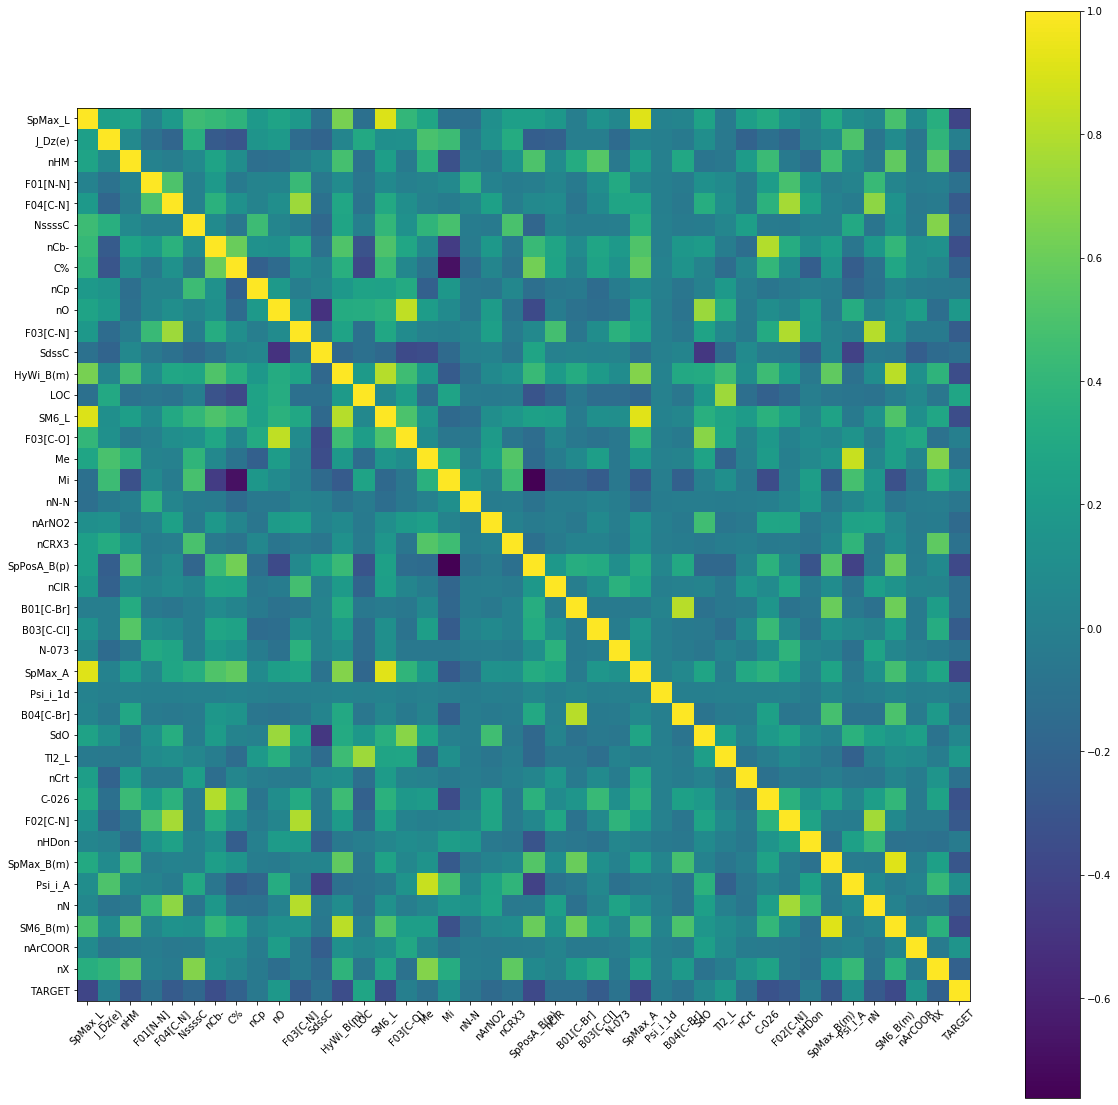

In [8]:
cm = np.corrcoef(df[df.columns].values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns, cell_values=False, figsize=(20, 20))
plt.show()